In [220]:
## BASIC
import numpy as np
import networkx as nx
import community
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
path = "C:/Users/ericluo04/Documents/GitHub/Bots-Project/Code/"

In [211]:
G = nx.DiGraph()
file = open('RT_graphs/G0_RT_GRAPH.csv', 'r').read().split('\n')

for i in file:
    if(len(i)>0 and np.random.random_sample() < .1):
        split = i.split(';')
        G.add_edge(int(float(split[0])), int(float(split[1])), weight = float(split[2]))

In [212]:
users = pd.DataFrame(list(G.nodes), columns = ["user_id"])
# import user polarity values and merge into data frame
polarities = pd.read_csv(path + "2. HK Training\polarities\polarities_new.csv")

users2 = users.merge(polarities, left_on='user_id', right_on='id', how='left')[['user_id', 'polarity']]
polarity = list(users2['polarity'])

In [233]:
A = nx.to_numpy_matrix(G)
pos = nx.spring_layout(G)

In [250]:
divide=[]
for i in range(len(polarity)):
    if polarity[i]>.5 or polarity[i]=='nan':
        divide.append(1)
    else:
        divide.append(0)

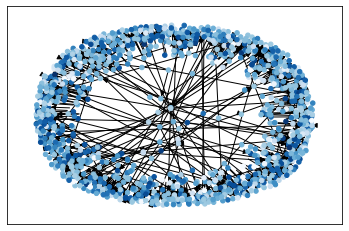

In [236]:
nx.draw_networkx(G, pos, with_labels=False, node_color=polarity, cmap='Blues', node_size=20)

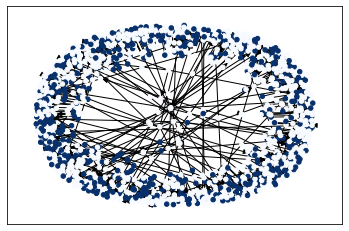

In [254]:
nx.draw_networkx(G, pos, with_labels=False, node_color=divide, cmap='Blues', node_size=20)

In [224]:
G_undir = G.to_undirected()
partition = community.best_partition(G_undir)

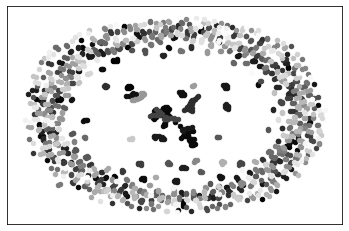

In [225]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_undir)
count = 0
for com in set(partition.values()):
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_undir, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_undir, pos, alpha=0.5)
plt.show()